In [ ]:
import osmnx as ox
import networkx as nx
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_pickle('./oneday')

In [4]:
print(df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2016-01-03 00:00:00   2016-01-03 00:02:39                1   
1         1  2016-01-03 00:00:00   2016-01-03 00:12:19                1   
2         2  2016-01-03 00:00:00   2016-01-03 00:06:11                1   
3         2  2016-01-03 00:00:00   2016-01-03 00:00:00                2   
4         2  2016-01-03 00:00:00   2016-01-03 00:04:50                1   

   trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
0           0.30        -73.998238        40.745426           1   
1           3.70        -73.991905        40.735172           1   
2           0.73        -73.987511        40.741360           1   
3           1.00        -73.984268        40.725098           1   
4           0.99        -73.998138        40.735474           1   

  store_and_fwd_flag  dropoff_longitude  ...  payment_type  fare_amount  \
0                  N         -73.994743  ...             2          4.0

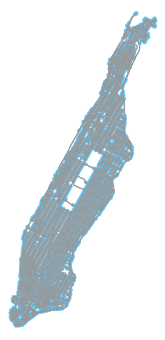

(<Figure size 195.384x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0b22bf4b00>)

In [10]:
G = ox.project_graph(ox.graph_from_place('Manhattan Island, New York City, New York, USA', network_type='drive'))
ox.plot_graph(G)

In [11]:
len(G.nodes())

4498

In [14]:
gen = nx.strongly_connected_components(G)
max_value = 0
index = 0
for i, v in enumerate(gen):
    if len(v) > max_value:
        max_value = len(v)
        index = i
        G_network = v

In [15]:
gen = nx.strongly_connected_components(G)
BadNodes = []
for i, v in enumerate(gen):
    if i != index:
        component = v
        for blacksheep in v:
            BadNodes.append(blacksheep)

for blacksheep in BadNodes:
    G.remove_node(blacksheep)

print(nx.is_strongly_connected(G))
len(G.nodes()) 

True


4411

In [18]:
G.nodes[42421728]

{'y': 4516859.090086696,
 'x': 587729.043732803,
 'osmid': 42421728,
 'highway': 'traffic_signals',
 'ref': nan,
 'lon': -73.9600437,
 'lat': 40.7980478}

In [10]:
NodeLon = []
NodeLat = []
NodeId = []
for nodes in G.node():
    NodeLon.append(G.node[nodes]['lon'])
    NodeLat.append(G.node[nodes]['lat'])
    NodeId.append(G.node[nodes]['osmid'])

PuLon = df.pickup_longitude
PuLat = df.pickup_latitude
DoLon = df.dropoff_longitude
DoLat = df.dropoff_latitude


In [192]:
import numpy as np
import math


puhublist = []

for i in range(0,len(PuLon)):
    judge = math.inf
    hub = 0  # ???
    for j in range(0,len(NodeLon)):
        distance = np.sqrt((PuLon[i]-NodeLon[j])**2 + (PuLat[i]-NodeLat[j])**2)
        if(distance < judge):
            judge = distance
            hub = NodeId[j]
    puhublist.append(hub)
    



In [193]:
dohublist = []

for i in range(0,len(DoLon)):
    judge = math.inf
    hub = 0
    for j in range(0,len(NodeLon)):
        distance = np.sqrt((DoLon[i]-NodeLon[j])**2 + (DoLat[i]-NodeLat[j])**2)
        if(distance < judge):
            judge = distance
            hub = NodeId[j]
    dohublist.append(hub)

In [201]:
df['puhub'] = np.array(puhublist)
df['dohub'] = np.array(dohublist)

In [202]:
print(df)

        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              1  2016-01-03 00:00:00   2016-01-03 00:02:39                1   
1              1  2016-01-03 00:00:00   2016-01-03 00:12:19                1   
2              2  2016-01-03 00:00:00   2016-01-03 00:06:11                1   
3              2  2016-01-03 00:00:00   2016-01-03 00:00:00                2   
4              2  2016-01-03 00:00:00   2016-01-03 00:04:50                1   
5              2  2016-01-03 00:00:01   2016-01-03 00:03:31                1   
6              1  2016-01-03 00:00:02   2016-01-03 00:15:09                1   
7              1  2016-01-03 00:00:03   2016-01-03 00:19:52                1   
8              2  2016-01-03 00:00:03   2016-01-03 00:09:20                1   
9              2  2016-01-03 00:00:03   2016-01-03 00:13:58                6   
10             2  2016-01-03 00:00:03   2016-01-03 00:05:01                1   
11             2  2016-01-03 00:00:04   

In [203]:
df.to_pickle('./add_hubs_os')

In [206]:
print(nx.is_strongly_connected(G),len(G.nodes()))

True 4376


In [209]:
pathtest = nx.single_source_dijkstra_path(G,42421728,weight = 'length')
stpathlength = nx.single_source_dijkstra_path_length(G,42421728,weight = 'length')

In [213]:
stpathlength[4597668031]

7347.427999999999

In [214]:
print(G.nodes[4597668031],G.nodes[42421728])

{'highway': 'traffic_signals', 'osmid': '4597668031', 'ref': nan, 'x': 585730.3389261044, 'y': 4510693.931302014, 'lon': -73.9845789, 'lat': 40.7427282} {'highway': 'traffic_signals', 'osmid': '42421728', 'ref': nan, 'x': 587729.3566539395, 'y': 4516859.027183867, 'lon': -73.96004, 'lat': 40.7980472}


In [289]:
DijPath = nx.all_pairs_dijkstra_path(G, weight = 'length')
DijPathLength = nx.all_pairs_dijkstra_path_length(G, weight = 'length')

In [ ]:
DijPathLe

In [290]:
DijPathLength_Generator = DijPathLength
DijLengthDict = {}
for ind,v in enumerate(DijPathLength_Generator):
    DijLengthDict[v[0]] = v[1]
print(len(DijLengthDict))

4376


In [291]:
DijPath_Generator = DijPath
DijPathDict = {}
for ind,v in enumerate(DijPath_Generator):
    DijPathDict[v[0]] = v[1]
print(len(DijPathDict))

4376


In [298]:
import pickle


f2 = open("./DijShortestPathLength","wb")
pickle.dump(DijLengthDict,f2)
f2.close()

In [302]:
for node in DijPathDict:
    print(DijPathDict[node])
    break

{42421728: [42421728], 42432736: [42421728, 42432736], 42435337: [42421728, 42435337], 42421731: [42421728, 42421731], 42437916: [42421728, 42421731, 42437916], 42435336: [42421728, 42435337, 42435336], 42432737: [42421728, 42432736, 42432737], 42435341: [42421728, 42432736, 42435341], 42421737: [42421728, 42421731, 42421737], 42435335: [42421728, 42435337, 42435336, 42435335], 42435343: [42421728, 42432736, 42435341, 42435343], 42447285: [42421728, 42421731, 42437916, 42447285], 42437917: [42421728, 42421731, 42437916, 42437917], 42447295: [42421728, 42432736, 42432737, 42447295], 42432744: [42421728, 42432736, 42432737, 42432744], 42447281: [42421728, 42421731, 42437916, 42447285, 42447281], 42435333: [42421728, 42435337, 42435336, 42435335, 42435333], 42447303: [42421728, 42432736, 42435341, 42435343, 42447303], 42435346: [42421728, 42432736, 42435341, 42435343, 42435346], 42421741: [42421728, 42421731, 42421737, 42421741], 4016646214: [42421728, 42432736, 42435341, 42435343, 424353

In [305]:
print(DijPathDict[42421728])

{42421728: [42421728], 42432736: [42421728, 42432736], 42435337: [42421728, 42435337], 42421731: [42421728, 42421731], 42437916: [42421728, 42421731, 42437916], 42435336: [42421728, 42435337, 42435336], 42432737: [42421728, 42432736, 42432737], 42435341: [42421728, 42432736, 42435341], 42421737: [42421728, 42421731, 42421737], 42435335: [42421728, 42435337, 42435336, 42435335], 42435343: [42421728, 42432736, 42435341, 42435343], 42447285: [42421728, 42421731, 42437916, 42447285], 42437917: [42421728, 42421731, 42437916, 42437917], 42447295: [42421728, 42432736, 42432737, 42447295], 42432744: [42421728, 42432736, 42432737, 42432744], 42447281: [42421728, 42421731, 42437916, 42447285, 42447281], 42435333: [42421728, 42435337, 42435336, 42435335, 42435333], 42447303: [42421728, 42432736, 42435341, 42435343, 42447303], 42435346: [42421728, 42432736, 42435341, 42435343, 42435346], 42421741: [42421728, 42421731, 42421737, 42421741], 4016646214: [42421728, 42432736, 42435341, 42435343, 424353

In [307]:
test = nx.dijkstra_predecessor_and_distance(G,42421728,weight = 'length')

In [312]:
test[0][42435336]

[42435337]

In [320]:
test[1][4597668031]

7347.427999999999

In [322]:
for node in test:
    print(node)
    break

{42421728: [], 42432736: [42421728], 42435337: [42421728], 42421731: [42421728], 42437916: [42421731], 42435336: [42435337], 42432737: [42432736], 42435341: [42432736], 42421737: [42421731], 42435335: [42435336], 42435343: [42435341], 42447285: [42437916], 42437917: [42437916], 42447295: [42432737], 42432744: [42432737], 42447281: [42447285], 42435333: [42435335], 42447303: [42435343], 42435346: [42435343], 42421741: [42421737], 4016646214: [42435346], 42435331: [42435333], 42433743: [4016646214], 42435736: [4016646214], 42437918: [42437917], 42443406: [42437917], 42432756: [42432744], 42435743: [42435736], 42452290: [42435736], 42447278: [42447281], 42447308: [42447303], 42443426: [42447303], 42447275: [42447278], 42425570: [42435331], 42435746: [42435743], 42446733: [42447308], 42443403: [42443406], 42435359: [42447308], 42425232: [42425570], 42431207: [42435746], 42437211: [42435746], 42443413: [42443426], 42442567: [42443426], 42447273: [42447275], 42437218: [42446733], 1061531654:

In [335]:
PredecessorDict = {}

for source in G.nodes():
    temp = nx.dijkstra_predecessor_and_distance(G,source,weight = 'length')
    PredecessorDict[source] = temp[0]
    
print(len(PredecessorDict))

4376


In [339]:
print(PredecessorDict[4597668031][42435337])

[42435336]


In [338]:
print(DijPathDict[4597668031][42435337])

[4597668031, 42445885, 42445888, 42436746, 42445404, 42445896, 42445899, 42445903, 42445365, 42434948, 42445908, 42445909, 42445910, 42445651, 42445914, 42432438, 42445916, 42445917, 42445920, 42444043, 42434074, 42445924, 42445926, 42438881, 42445928, 42440453, 42445930, 42436701, 42445936, 42445941, 42443612, 42432825, 42445947, 42445950, 42445953, 42436511, 42445961, 42429971, 42431650, 42445972, 42445976, 42437425, 42431674, 42445994, 42429682, 42445227, 42436477, 42438791, 42439556, 42430052, 42446013, 42446016, 42436913, 42446021, 42440397, 42427915, 42433564, 42435308, 42421800, 42424851, 42435310, 42434156, 42435312, 42421993, 42431447, 42435316, 42435317, 42435319, 42435323, 42435328, 42424439, 42425232, 42425570, 42435331, 42435333, 42435335, 42435336, 42435337]


In [343]:
f1 = open("./DijPredecessorDict","wb")
pickle.dump(PredecessorDict,f1)
f1.close()

In [345]:
test[4597668031][42445903]

[42445899]

In [347]:
type(test[4597668031][42445903][0])

int

In [348]:
type(DijLengthDict[4597668031][42445903])

float

In [349]:
print(df[0])

KeyError: 0